<p style="text-align:center"> 
<a href="https://skills.network" target="_blank"> 
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo"> 
</a>
</p>

# <h1 align="center"><font size="7"><strong>Final project</strong></font></h1>
## <h2 align= "center"><font size="6.8">**Homes for sale in King County, USA**</font></h2>

<hr>

## Part 3: Exploratory Data Analysis (EDA)

Once the data normalization is complete, we begin to look for the relationships and patterns that the data presents in the dataset.

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('../data/processed/data_clean.csv')

In [30]:
# We verify that it has been updated correctly
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
# For some reason, the file has an extra column that isn't needed
# and has no name. We delete it.
try:
    df.drop(columns='Unnamed: 0', inplace=True)
    df.to_csv('../data/processed/data_clean.csv', index=False)
except KeyError:
    pass

As we've already determined, a house with an ocean view is a key feature that will influence a home's price.

Let's start with this and separate the dataset into those with and without this feature to see how these magnitudes are handled.

Procedure:

* We define the number of houses based on whether they are oceanfront (Yes/True = 1 and No/False = 0) and save it in a data frame.

In [32]:
number_of_houses_with_or_without_waterfront = df['waterfront'].value_counts().to_frame()

number_of_houses_with_or_without_waterfront

,count
waterfront,
0,21450
1,108


### Analysis through visualizations

Visualize data through a box plot, which is perfect for descriptive statistics.

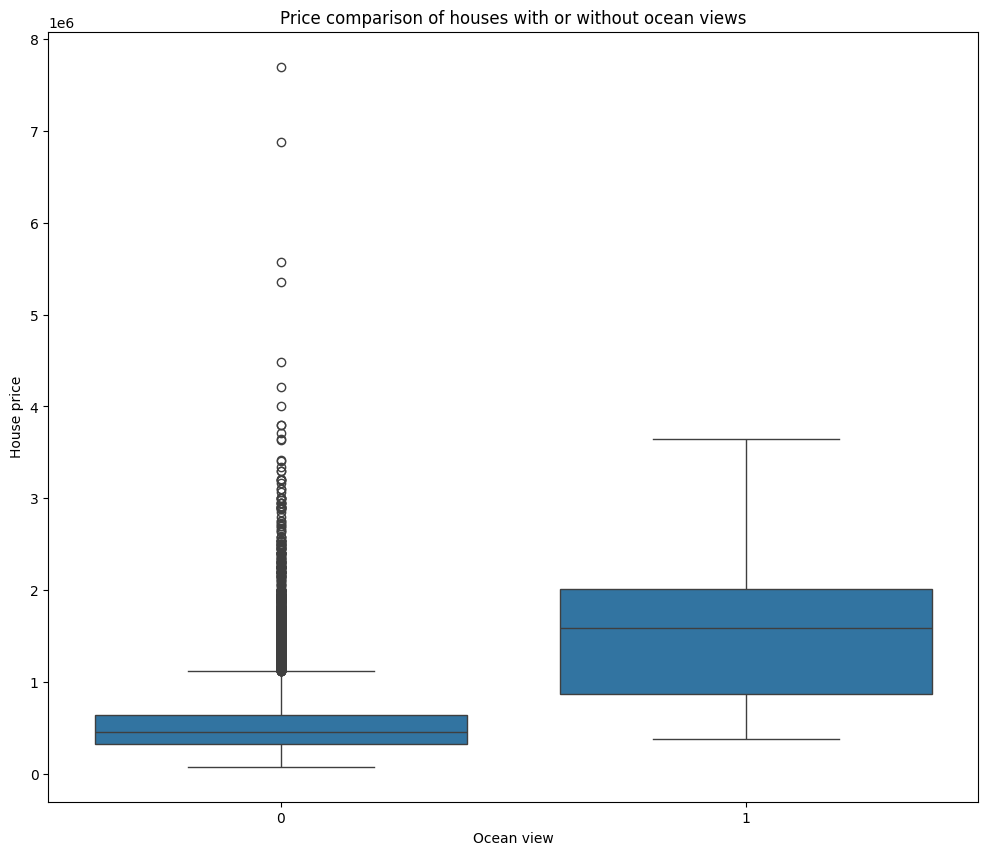

In [33]:
houses_ocean_view = df['waterfront']

plt.figure(figsize=(12, 10))
sns.boxplot(x=houses_ocean_view, y=df['price'])
plt.title("Price comparison of houses with or without ocean views")
plt.ylabel("House price")
plt.xlabel("Ocean view")
plt.savefig("../figures/part3-eda-price-comparison-ocean-views.png", dpi=300, bbox_inches='tight')
plt.show()

### What conclusion can we draw from this box plot?

> Note: Remember that we removed all outliers from our dataset based on houses with ocean views, so the box plot for <code>waterfront = 1</code> will NOT have outliers.</block>

Essentially, we are comparing the prices of all houses with or without ocean views vs. the price <code>(df['price'])</code>. In the first plot, when <code>df['waterfront'] = 0</code> (without ocean frontage), prices are considerably lower compared to cases where <code>df['waterfront'] = 1</code> (with ocean frontage). This creates a narrower price range, and the remaining values ​​are classified as outliers (represented outside the 'whiskers' of the box). On the other hand, in the second figure the data range is much wider and has no outliers.

Another characteristic that might lead us to believe this is closely linked to price is <code>sqft_living</code> (Square Feet of the House), for example.

Let's see how it correlates with `price`, whether negatively or positively.

Let's use the <code>regplot</code> function in the Seaborn library to determine the relationship between these two variables.

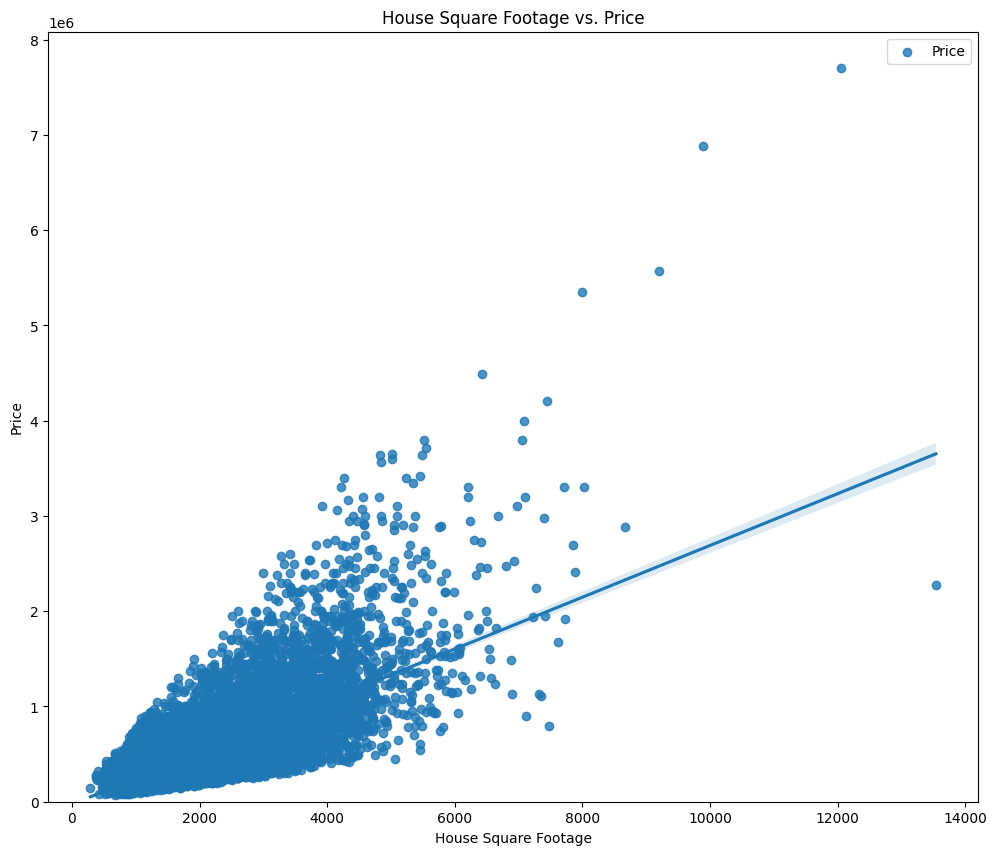

In [34]:
plt.figure(figsize=(12, 10))
sns.regplot(x="sqft_living", y="price", data=df)
plt.title('House Square Footage vs. Price')
plt.xlabel('House Square Footage')
plt.ylabel('Price')
plt.legend(['Price'])
plt.ylim(0,)
plt.savefig("../figures/part3-eda-square-footage-vs-price.png", dpi=300, bbox_inches='tight')
plt.show()

Indeed, we see that the figure we obtain when comparing these two variables shows that as one increases, so does the other. This indicates a positive linear relationship.

We could view them one by one to find the most pronounced trends between the variables.

Or we can use some Pandas methods like <code>corr()</code>, to find the <strong>non-price</strong> feature that is most correlated with it.

In [35]:
# We calculate the correlation of 'price' with other features, excluding 'price' itself.
correlations = df.corr()['price'].drop('price')

# We display the full list of correlations.
print("Correlation of all features with 'price' (excluding itself):")
for feature, value in correlations.items():
    print(f"{feature}: {value:.2f}")

Correlation of all features with 'price' (excluding itself):
bedrooms: 0.31
bathrooms: 0.53
sqft_living: 0.70
sqft_lot: 0.09
floors: 0.26
waterfront: 0.21
view: 0.38
condition: 0.04
grade: 0.67
sqft_above: 0.60
sqft_basement: 0.31
yr_built: 0.06
yr_renovated: 0.12
zipcode: -0.05
lat: 0.32
long: 0.02
sqft_living15: 0.59
sqft_lot15: 0.08


We can see that the feature most correlated with `price` is:
* ``sqft_living`` (correlation: 0.70)

Let's see these relationships between variables and price more clearly using a heat chart.

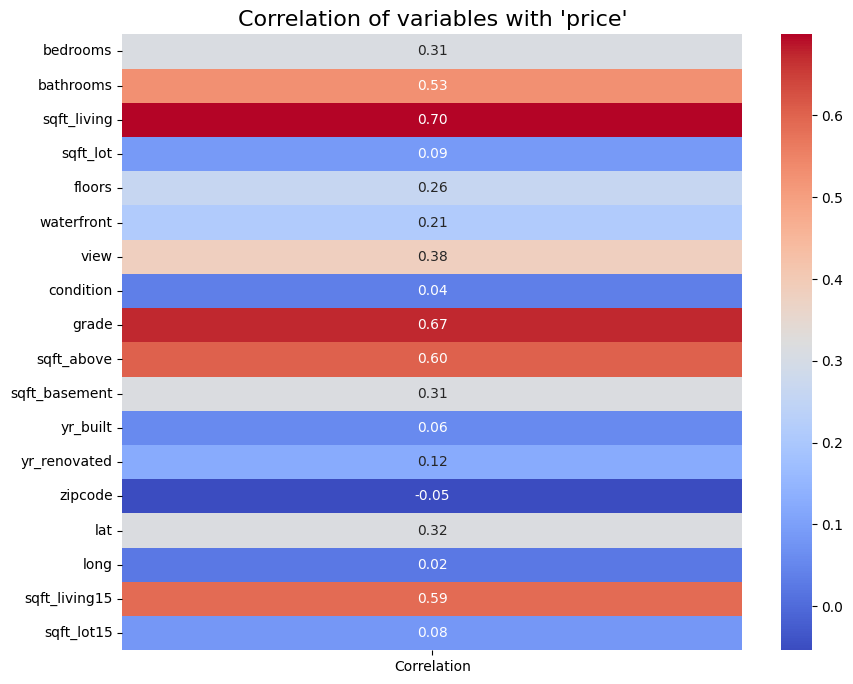

In [36]:
# Set the chart size.
plt.figure(figsize=(10, 8))

# Create a DataFrame for the specific correlations with 'price'.
heatmap_data = correlations.to_frame(name='Correlation')

# Generate the heatmap.
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")

# Add the title.
plt.title("Correlation of variables with 'price'", fontsize=16)

# Save the heatmap as a PNG file.
plt.savefig("../figures/part3-eda-correlation-heatmap.png", dpi=300, bbox_inches='tight')

# Show the heatmap.
plt.show()

With this, we see that the most determining characteristic in a house's price (or at least the one with the highest correlation percentage) is the square footage (sqft_living) of the house. We've already seen this using the pandas .corr() method.

Now that we have this data we can try to fit a linear regression model using "square feet of the house" as a predictor variable <code>('sqft_living')</code> and thus calculate the R^2 (coefficient of determination).

<hr>

## Author

<a href="https://www.linkedin.com/in/flavio-aguirre-12784a252/">**Flavio Aguirre**</a><br>
<a href="https://coursera.org/share/e27ae5af81b56f99a2aa85289b7cdd04">***Data Scientist***</a>